# Feature Selection & Dimensionality Reduction

### Table of Contents



###1.   Introduction to Dimensionality Reduction
###2.   What is Curse of Dimensionality 
###3.   Linear-Dimensionality Reduction


  a. Principal Component Analysis(PCA)
   

*   Checking for Multicollinearity
*   Deciding n_component for PCA
*   Implementing Logistic Regression on PCA-transformed data

b. Linear Discriminant Analysis(LDA)



### 4.   Feature Selection





### Dimensionality Reduction


The abundance of data in current datasets is a challenge for researchers, as it requires the development of clever algorithms to extract important information effectively. Here the curse of dimensionality comes into the picture;  this phenomenon occurs in data analysis when dealing with high-dimensional data. In high-dimensional spaces, the data becomes more sparse and the distances between points become more similar, making it difficult to distinguish between different classes or patterns.

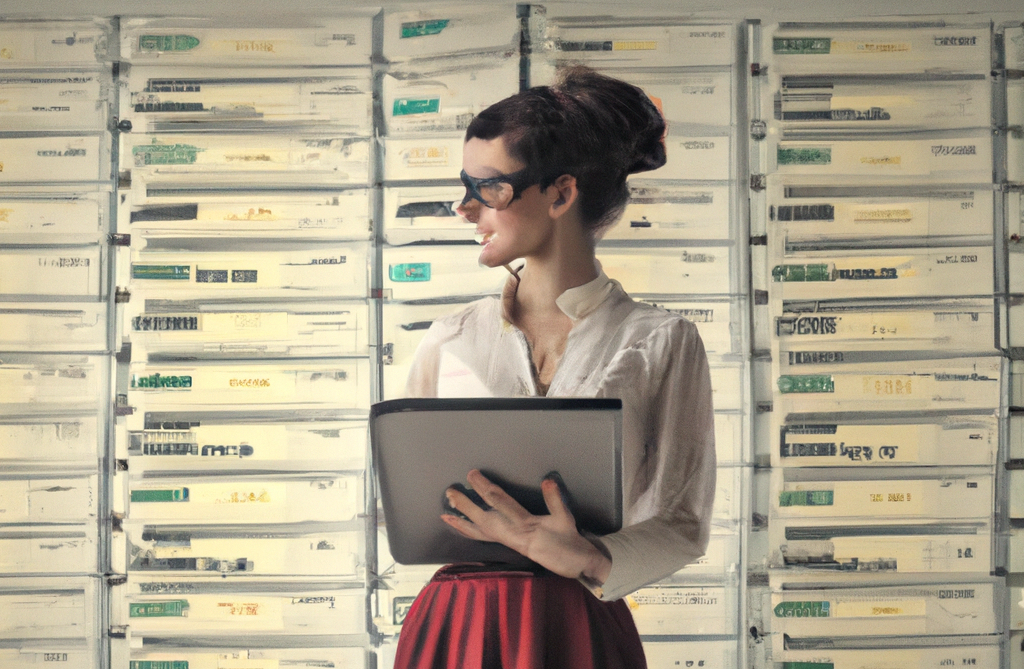

**Curse of Dimensionality**


*  Overfitting: In high-dimensional spaces, models can easily fit to noise in the data rather than the underlying patterns. 

*  Computational difficulties: Some algorithms can become computationally expensive or infeasible when dealing with high-dimensional data.

*   Difficulty in visualizing the data: It becomes challenging to visualize high-dimensional data, making it difficult to understand the relationships between variables.







Hence, before the process of constructing data models can begin pre-processing steps are necessary to reduce the size of the dataset and adapt it for analysis with specific methods. Pre-processing includes various methods such as dimensionality reduction or feature selection which aim at reducing complexity by removing redundant features from a given set without sacrificing accuracy too much.





## Linear Dimensionality Reduction

Linear dimensionality reduction is a family of methods used to reduce the dimensionality of a high-dimensional dataset by projecting it onto a lower-dimensional subspace while preserving as much of the original data's structure as possible. These methods are "linear" because they operate by finding linear combinations of the original variables that capture most of the variance in the data.


### 1.   Principal Component Analysis(PCA)

PCA is a widely used technique for linear dimensionality reduction. It identifies the directions of maximum variance in the data and projects the data onto these directions, called principal components.

In dimensionality reduction, its primary goal is to reduce the number of variables (dimensions) in a dataset while still retaining as much of the variance in the data as possible. This is accomplished by projecting the original data onto a smaller number of orthogonal dimensions, or principal components, that capture the majority of the variation in the data.

On the other hand, when PCA is used for feature extraction, the goal is to transform the original variables into a new set of variables that better capture the underlying structure of the data. In this case, the principal components are used as new features that can be used in downstream analysis. This approach can be useful when the original variables are not informative enough for a given task or when there are too many variables to handle efficiently.

So, while the basic mathematical technique of PCA is the same in both cases, the specific goals and the ways in which the results are used can differ.


Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


To apply PCA, you would need a numerical dataset consisting of continuous variables (i.e., not categorical data). The dataset should have at least two variables, and it is recommended to have at least 5 to 10 times as many observations as there are variables.

In [ ]:
cust_transaction=pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/new_cust_transaction_train.csv')

In [ ]:
print(cust_transaction.shape)
cust_transaction.head()

(10000, 202)


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [ ]:
cust_transaction.drop(columns=['ID_code'],inplace=True)

In [ ]:
cust_transaction.describe()

target         var_0         var_1         var_2         var_3  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.099400     10.672717     -1.621588     10.709760      6.796787   
std        0.299213      3.041680      4.077271      2.638402      2.045605   
min        0.000000      1.335000    -13.422700      3.309000      1.154100   
25%        0.000000      8.452675     -4.779075      8.723700      5.253625   
50%        0.000000     10.515750     -1.600700     10.543200      6.820850   
75%        0.000000     12.759675      1.360375     12.517650      8.323000   
max        1.000000     19.289300      8.584900     18.347700     12.977300   

              var_4         var_5         var_6         var_7         var_8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      11.089333     -5.035794      5.403145     16.621291      0.284163   
std        1.624462      7.850295      0.870482      3.434960      3.314391   
min        5.943000    -29.013300      2.673300      7.642200     -9.991100   
25%        9.878450    -11.202600      4.766850     14.007650     -2.266200   
50%       11.108350     -4.852750      5.387700     16.582050      0.316250   
75%       12.276350      1.004025      5.998100     19.190900      2.914325   
max       15.366400     17.251600      7.875500     26.965600      9.103800   

       ...       var_190       var_191       var_192       var_193  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      3.245790      7.457053      1.944307      3.316543   
std    ...      4.585233      3.039712      1.476938      4.005774   
min    ...    -11.593900     -1.215800     -3.515900     -9.442700   
25%    ...     -0.106575      5.151700      0.919650      0.569625   
50%    ...      3.290200      7.356400      1.933300      3.390000   
75%    ...      6.420875      9.532025      2.966875      6.176625   
max    ...     16.614400     16.398500      7.139000     16.782600   

            var_194       var_195       var_196       var_197       var_198  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      18.022159     -0.171431      2.277032      8.912337     15.882229   
std        3.171094      1.419062      5.430852      0.918565      3.008292   
min       10.387000     -4.488300    -12.325500      6.256900      7.233700   
25%       15.615875     -1.201925     -1.978400      8.259475     13.855300   
50%       17.950000     -0.203500      2.449500      8.895450     15.915950   
75%       20.483700      0.784025      6.483725      9.597925     18.088900   
max       27.485800      3.555400     18.321500     11.843900     25.442200   

            var_199  
count  10000.000000  
mean      -3.480591  
std       10.466326  
min      -36.302500  
25%      -11.460400  
50%       -3.000700  
75%        4.654200  
max       25.831600  

[8 rows x 201 columns]




Finally, it is important to carefully consider the goals and assumptions of your analysis before applying PCA. PCA can be a powerful tool for understanding and visualizing the structure of a dataset, but it is not always appropriate or necessary for every situation.

Checking for Null values

In [ ]:
cust_transaction.isnull().sum().unique()

array([0])

In [ ]:
X=cust_transaction.iloc[:,1:]
y=cust_transaction.iloc[:,0]

In [ ]:
print(X.shape)
X.head()

(10000, 200)


var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [ ]:
print(y.shape)
y.head()

(10000,)


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Checking for Multicollinearity

PCA assumes that the variables are linearly related, so it is important to check for multicollinearity before applying PCA. If there is high correlation between the variables, PCA may not be appropriate.

In [ ]:
correlation=data.corr()                                                         # Finding eigen values
eigenvalues, eigenvectors = np.linalg.eig(correlation)                          # print(eigenvalues, eigenvectors)

The eigenvalues represent the variance explained by each principal component. If there are one or more small eigenvalues, it indicates that the variables are highly correlated and that there may be multicollinearity in the data. 

In [ ]:
small_eigenvalues = eigenvalues[eigenvalues < 1]                                  # Threshold may vary as per situation

if len(small_eigenvalues) > 0:
    print("There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated")
else:
    print("There are no small eigenvalues in the correlation matrix.")

There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated


Moreover, PCA requires that the data be standardized, meaning that each variable should be scaled to have a mean of zero and a standard deviation of one. This is necessary because PCA is sensitive to differences in scale between variables, and standardization ensures that all variables are treated equall

In [ ]:
X_scaled=StandardScaler().fit_transform(X)                                                # Standardized the data

### Deciding n_components for PCA

Calculate the total sum of eigenvalues.








In [ ]:
sortedValues = np.argsort(eigenvalues, axis=0)[::-1]
sortedVectors = eigenvectors[:, sortedValues]

Calculate the proportion of variance explained by each principal component by dividing the eigenvalue of each principal component by the total sum of eigenvalues.

Calculate the cumulative proportion of variance explained by adding up the proportions of variance explained by the principal components

Choose the number of principal components that explain a desired amount of variance.

(1.0, 10.0)

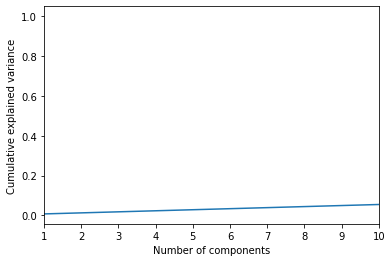

In [ ]:
cumulative_sum = np.cumsum(eigenvalues[sortedValues]) / np.sum(eigenvalues[sortedValues])
xint = range(1, len(cumulative_sum) + 1)
plt.plot(xint, cumulative_sum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 10, 1)

Deciding the appropriate number of principal components for PCA is an important step in dimensionality reduction. There are a few methods that can be used to determine the appropriate number of principal components to use. Here are three common methods:



1.   Scree Plot: A scree plot shows the amount of variance explained by each principal component. We can choose the number of principal components that correspond to the "elbow" in the scree plot, which is the point at which adding additional components provides diminishing returns in terms of explained variance.



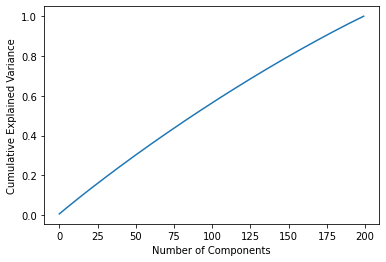

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

2. Proportion of variance explained: Another approach is to choose the number of principal components that explain a certain proportion of the variance in the data. For example, we might choose to retain enough principal components to explain 95% of the variance in the data.

In [ ]:
pca = PCA(0.95)                                                                 # Retain enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca.shape                                                                     # Shape of data after applying PCA

(10000, 187)

## Implementing Logistic Regression on PCA transformed data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression model on transformed data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test set and evaluate performance
y_pred = lr.predict(X_test)

In [ ]:
# Evaluate the model on the training data
train_accuracy = lr.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = lr.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.914875
Testing accuracy: 0.918


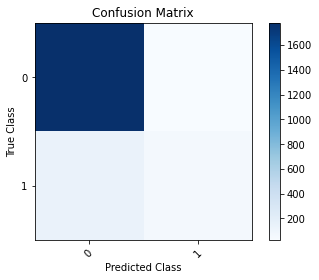

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1804
           1       0.70      0.29      0.41       196

    accuracy                           0.92      2000
   macro avg       0.81      0.64      0.68      2000
weighted avg       0.90      0.92      0.90      2000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

A common approach would be to select the smallest number of components that explain at least 95% of the variance in the data. But in this case the n number of components were not able to explain significant amount of data

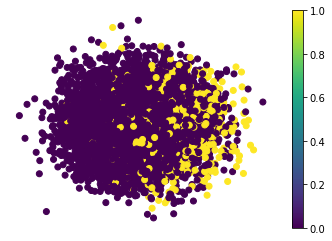

In [ ]:
from sklearn.decomposition import PCA
PCA_train_x = PCA(2).fit_transform(X_scaled)

plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1],c=y)
plt.axis('off')
plt.colorbar()
plt.show()

## LDA (Linear Discriminant Analysis)

LDA (Linear Discriminant Analysis) is a dimensionality reduction technique that can be used for classification tasks as well as for reducing the dimensionality of a dataset. The goal of LDA is to project the data onto a lower-dimensional space while preserving the class-discriminatory information.


LDA aims to find the linear combinations of the original features that maximize the separation between different classes.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()                                                            # Standardizing the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Implementing LDA(Linear Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Transforming data using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)


In [ ]:
# Evaluate the model on the training data
train_accuracy = clf.score(X_train_lda, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = clf.score(X_test_lda, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.915
Testing accuracy: 0.9155


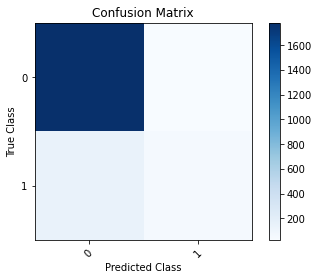

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1804
           1       0.68      0.26      0.37       196

    accuracy                           0.92      2000
   macro avg       0.80      0.62      0.66      2000
weighted avg       0.90      0.92      0.90      2000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

## Feature Selection

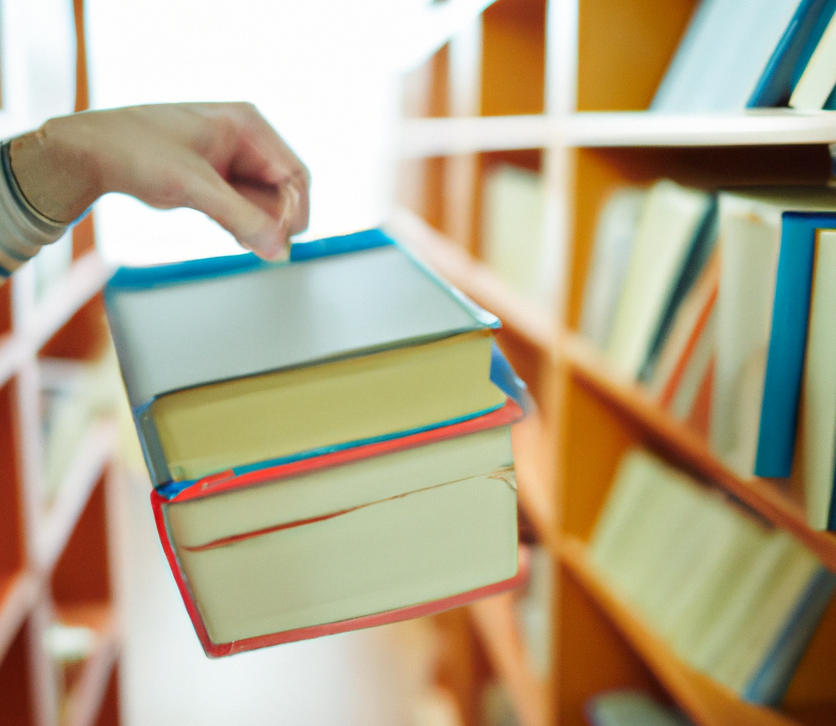


##Introduction

The abundance of data in contemporary datasets is a challenge for researchers, as it requires the development of clever algorithms to effectively extract important information. Data mining tasks such as classification, regression, and clustering can be used to construct data models that help uncover hidden patterns in the dataset. However, before this process can begin pre-processing steps are necessary to reduce the size of the dataset and adapt it for analysis with specific methods. This step is particularly important nowadays due to an ever-growing number of available analysis techniques which require large datasets for accurate results.

Pre-processing includes various methods such as dimensionality reduction or feature selection which aim at reducing complexity by removing redundant features from a given set without sacrificing accuracy too much; normalization or standardization procedures ensure that all features have similar scales so they don't dominate each other during processing; finally, discretization may be applied when dealing with continuous variables like age or salary ranges where certain values need grouping together into categories according to their relevance within a given context. All these processes come together towards creating an optimal environment where machine learning algorithms can work efficiently on large amounts of data while still producing reliable outcomes based on relevant insights extracted from them.

Data pre-processing plays a crucial role in modern research since it allows us not only to reduce computational time but also to prepare our datasets accordingly so they fit better into existing analytical frameworks resulting in more precise findings derived from them. Therefore understanding how different techniques like those mentioned above interact with one another should become part of every researcher's toolkit if he wants his investigations based on big data sets to yield meaningful results worthy of being presented and discussed further among peers within scientific communities around the world.

##Why do we need Feature Reduction?
The problem of the high number of features in a dataset is important for students to understand, as it can lead to model overfitting and poor results on validation datasets. To combat this issue, feature extraction and selection methods must be utilized. Feature extraction methods such as Principal Component Analysis, Linear Discriminant Analysis, and Multidimensional Scaling work by transforming the original features into a new set constructed from the original one based on their combinations[1]; with the goal being that more meaningful information may be discovered in this newly formed set.
Feature selection also plays an important role in reducing dimensionality within data sets while maintaining accuracy rates or improving them if done correctly. This process involves selecting only those attributes which are most relevant to predicting target variables accurately while discarding irrelevant ones which could potentially cause noise during training models or lead to incorrect predictions due to biases towards certain features rather than others present within the dataset itself.
In conclusion, understanding how feature reduction techniques such as feature extraction and selection can help reduce dimensionality is essential for students when working with large datasets containing numerous samples/features so they do not run into issues like model overfitting leading to poor performance results later down the line when validating these models against unseen data points/samples outside the training environment.

##Classifying Feature Selection Methods
Feature selection methods can be classified in a number of ways. The most common one is the classification into filters, wrappers, embedded, and hybrid methods[2].

###Filter Methods
Filter methods are an important tool for data scientists to select features based on a performance measure regardless of the employed data modelling algorithm. This method can be used in order to identify and rank individual features or evaluate entire feature subsets, thus providing more accurate results for any given task. 

This is done by measuring different characteristics of each feature such as information, distance, consistency, similarity and statistical measures. By evaluating these metrics it is possible to determine which features will provide the best predictive power when creating models from datasets with many variables available. This helps reduce overfitting while also improving model accuracy by selecting only those that have significant importance in predicting outcomes or behaviours associated with them. 

Overall filter methods are highly useful tools when dealing with large datasets as they allow us to quickly identify relevant variables without having too much knowledge about the underlying structure of our dataset beforehand; this makes them especially suitable for exploratory analysis tasks where we don’t know exactly what kind of patterns exist within our dataset yet but still need some way to make sense out of it all before diving deeper into more complex modelling techniques like machine learning algorithms and neural networks.

 

###Wrapper Methods
Wrapper methods are a powerful approach to feature selection for students. This type of method evaluates the quality of subsets by using a modelling algorithm as an evaluator, such as Naïve Bayes or SVM[3] for classification tasks and K-means[4] for clustering tasks. Wrappers differ from filters in that they require evaluation each time a subset is generated, which makes them slower than filter methods when it comes to finding suitable subsets. 

The advantage with wrappers is that they allow us to optimize the performance of our model on unseen data rather than just selecting features based on their individual characteristics alone. The wrapper can be used iteratively in order to find an optimal set of features which will provide better accuracy while still being computationally efficient enough so that it doesn’t take too long before results are obtained. 

Overall, wrappers offer students flexibility and control over their feature selection process since different search strategies can be tested out until one yields satisfactory results without having any prior knowledge about what kind of features might work best beforehand; this allows us to maximize predictive accuracy while minimizing computational cost at the same time!

###Embedded and Hybrid Methods
Embedded methods are a useful tool for feature selection during the modelling algorithm's execution. These methods are built into the algorithm as either normal or extended functionality, making them easy to use and highly effective in many situations. Common embedded methods include various types of decision tree algorithms such as CART, C4.5 and random forest. 

These embedded methods allow for efficient feature selection by determining which features best explain the data set being studied while reducing overfitting risk at the same time. This is done through a combination of splitting criteria that determine how nodes can be split based on different variables in order to create an optimal model structure with minimal complexity or over-specification errors when predicting outcomes from unseen data sets. 

Overall, embedded methods provide students with an excellent way to select features during their modelling process without having to manually search through all possible combinations themselves; instead they can rely on these automated processes which make it easier and faster than ever before! With this powerful tool at their disposal, students will have no trouble creating accurate models that accurately predict outcomes from unseen datasets quickly and effectively – giving them more time for other tasks related to their studies!

###Structured and Streaming Features
The Grafting algorithm is a regularization-based approach that considers the structure of features in the dataset. It works by first selecting a subset of features and then gradually adding more based on their correlation with other selected features. This method can be used to identify groups of related variables, as well as those which are less correlated with each other. 

The Alpha-Investing algorithm[5] is another feature selection method that uses Lasso regularization to select relevant subsets from datasets containing structured data such as spatial or temporal smoothness, disjoint/overlapping groups, and tree-or graph-like structures. The OSFS algorithm[6] also uses Lasso regularization for feature selection but it further divides the dataset into subgroups according to certain criteria before applying this technique so that only relevant variables are selected within each group separately. 
Finally, there is also a dynamic fuzzy rough set approach[7] which takes into account both static and dynamic aspects when selecting an optimal subset from datasets containing complex structures like graphs or trees.. This method works by finding patterns between different sets of attributes over time in order to determine how they interact together when predicting outcomes accurately; thus allowing us to use only those attributes which contain important information while ignoring others who may not contribute much towards prediction accuracy at all times.




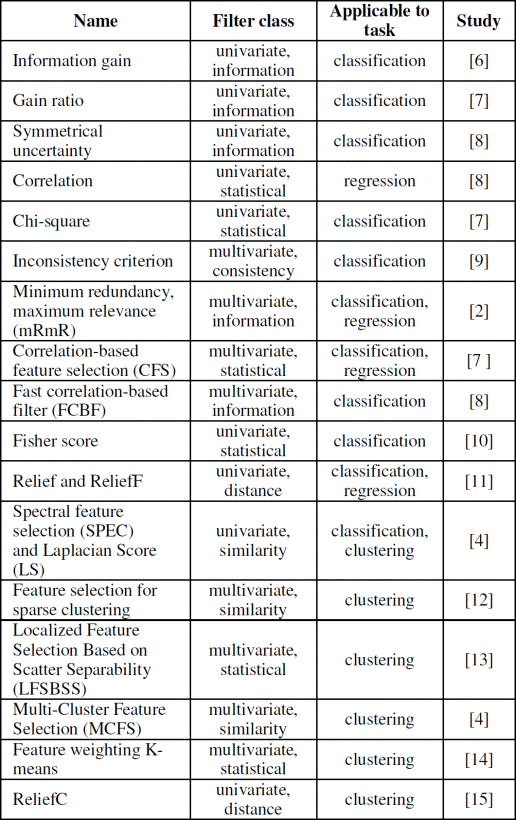


The Information Gain measures the decrease in randomness or uncertainty in a dataset that results from a specific transformation. This metric can aid in selecting relevant features by assessing the Information Gain of each variable relative to the target variable.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X, Y = cancer.data, cancer.target

data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data

mean radius mean texture mean perimeter mean area mean smoothness  \
0         17.99        10.38         122.80    1001.0         0.11840   
1         20.57        17.77         132.90    1326.0         0.08474   
2         19.69        21.25         130.00    1203.0         0.10960   
3         11.42        20.38          77.58     386.1         0.14250   
4         20.29        14.34         135.10    1297.0         0.10030   
..          ...          ...            ...       ...             ...   
564       21.56        22.39         142.00    1479.0         0.11100   
565       20.13        28.25         131.20    1261.0         0.09780   
566       16.60        28.08         108.30     858.1         0.08455   
567       20.60        29.33         140.10    1265.0         0.11780   
568        7.76        24.54          47.92     181.0         0.05263   

    mean compactness mean concavity mean concave points mean symmetry  \
0            0.27760        0.30010             0.14710        0.2419   
1            0.07864        0.08690             0.07017        0.1812   
2            0.15990        0.19740             0.12790        0.2069   
3            0.28390        0.24140             0.10520        0.2597   
4            0.13280        0.19800             0.10430        0.1809   
..               ...            ...                 ...           ...   
564          0.11590        0.24390             0.13890        0.1726   
565          0.10340        0.14400             0.09791        0.1752   
566          0.10230        0.09251             0.05302        0.1590   
567          0.27700        0.35140             0.15200        0.2397   
568          0.04362        0.00000             0.00000        0.1587   

    mean fractal dimension  ... worst radius worst texture worst perimeter  \
0                  0.07871  ...       25.380         17.33          184.60   
1                  0.05667  ...       24.990         23.41          158.80   
2                  0.05999  ...       23.570         25.53          152.50   
3                  0.09744  ...       14.910         26.50           98.87   
4                  0.05883  ...       22.540         16.67          152.20   
..                     ...  ...          ...           ...             ...   
564                0.05623  ...       25.450         26.40          166.10   
565                0.05533  ...       23.690         38.25          155.00   
566                0.05648  ...       18.980         34.12          126.70   
567                0.07016  ...       25.740         39.42          184.60   
568                0.05884  ...        9.456         30.37           59.16   

    worst area worst smoothness worst compactness worst concavity  \
0       2019.0          0.16220           0.66560          0.7119   
1       1956.0          0.12380           0.18660          0.2416   
2       1709.0          0.14440           0.42450          0.4504   
3        567.7          0.20980           0.86630          0.6869   
4       1575.0          0.13740           0.20500          0.4000   
..         ...              ...               ...             ...   
564     2027.0          0.14100           0.21130          0.4107   
565     1731.0          0.11660           0.19220          0.3215   
566     1124.0          0.11390           0.30940          0.3403   
567     1821.0          0.16500           0.86810          0.9387   
568      268.6          0.08996           0.06444          0.0000   

    worst concave points worst symmetry worst fractal dimension  
0                 0.2654         0.4601                 0.11890  
1                 0.1860         0.2750                 0.08902  
2                 0.2430         0.3613                 0.08758  
3                 0.2575         0.6638                 0.17300  
4                 0.1625         0.2364                 0.07678  
..                   ...            ...                     ...  
564               0.22

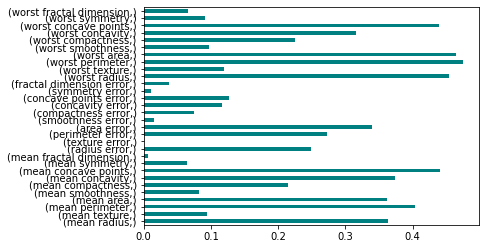

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X.astype(int)
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, Y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:',X_kbest_features.shape[1])

Original feature number: 30
Reduced feature number: 3


In [ ]:
import seaborn as shs 
import matplotlib.pyplot as plt
%matplotlib inline
#Correlation
cor = data.corr()
# Plotting Heatmap
plt.figure(figsize = (10,6))
shs.heatmap(cor, annot = True)

<AxesSubplot:xlabel='None', ylabel='None'>

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Forword Feature Selection
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

import sklearn.externals as extjoblib
import joblib
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2023-03-11 06:48:31] Features: 1/3 -- score: 0.929701230228471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.4s finished

[2023-03-11 06:48:31] Features: 2/3 -- score: 0.9578207381370826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2023-03-11 06:48:32] Features: 3/3 -- score: 0.9595782073813708

In [ ]:
sfs1.subsets_

{1: {'feature_idx': (22,),
  'cv_scores': array([0.92970123]),
  'avg_score': 0.929701230228471,
  'feature_names': ('22',)},
 2: {'feature_idx': (1, 22),
  'cv_scores': array([0.95782074]),
  'avg_score': 0.9578207381370826,
  'feature_names': ('1', '22')},
 3: {'feature_idx': (1, 20, 22),
  'cv_scores': array([0.95957821]),
  'avg_score': 0.9595782073813708,
  'feature_names': ('1', '20', '22')}}

In [ ]:
feature_names = ('mean radius',
'mean texture',
'mean perimeter',
'mean area',
'mean smoothness',
'mean compactness',
'mean concavity',
'mean concave points',
'mean symmetry',
'mean fractal dimension',
'radius error',
'texture error',
'perimeter error',
'area error',
'smoothness error',
'compactness error',
'concavity error',
'concave points error',
'symmetry error',
'fractal dimension error',
'worst radius',
'worst texture',
'worst perimeter',
'worst area',
'worst smoothness',
'worst compactness',
'worst concavity',
'worst concave points',
'worst symmetry',
'worst fractal dimension')

sfs1 = sfs1.fit(X, Y, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished

[2023-03-11 06:48:33] Features: 1/3 -- score: 0.929701230228471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.6s finished

[2023-03-11 06:48:33] Features: 2/3 -- score: 0.9578207381370826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.4s finished

[2023-03-11 06:48:34] Features: 3/3 -- score: 0.9595782073813708

{1: {'feature_idx': (22,),
  'cv_scores': array([0.92970123]),
  'avg_score': 0.929701230228471,
  'feature_names': ('worst perimeter',)},
 2: {'feature_idx': (1, 22),
  'cv_scores': array([0.95782074]),
  'avg_score': 0.9578207381370826,
  'feature_names': ('mean texture', 'worst perimeter')},
 3: {'feature_idx': (1, 20, 22),
  'cv_scores': array([0.95957821]),
  'avg_score': 0.9595782073813708,
  'feature_names': ('mean texture', 'worst radius', 'worst perimeter')}}

In [ ]:
sfs1.k_feature_idx_

(1, 20, 22)

In [ ]:
sfs1.k_feature_names_

('mean texture', 'worst radius', 'worst perimeter')

In [ ]:
sfs1.k_score_

0.9595782073813708

References
1.	J. Tang, S. Alelyani and H. Liu, "Feature Selection for Classification: A Review" in Data Classification: Algorithms and Applications, CRC Press, 2014.
2.	N. Hoque, D. K. Bhattacharyya and J. K. Kalita, "MIFS-ND: A mutual information-based feature selection method", Expert Systems with Applications, vol. 41, no. 14, pp. 6371-6385, 2014.
3.	P. S. Bradley and O. L. Mangasarian, "Feature selection via concave minimization and support vector machines", Proc. 15th International Conference on Machine Learning (ICML-1998), pp. 82-90, 1998.
4.	Y. S. Kim, W. N. Street and F. Menczer, "Evolutionary model selection in unsupervised learning", Intelligent Data Analysis, vol. 6, no. 6, pp. 531-556, 2002.
5.	D. Zhou, J. Huang and B. Schölkopf, "Learning from labeled and unlabeled data on a directed graph", Proc. 22nd International Conference on Machine Learning (ICML-2005), pp. 1041-1048, 2005.
6.	X. Wu, K. Yu, H. Wang and W. Ding, "Online streaming feature selection", Proceedings of the 27th international conference on machine learning (ICML-2010), pp. 1159-1166, 2010.
7.	R. Diao, M. N. Parthalain and Q. Shen, "Dynamic feature selection with fuzzy-rough sets", Proc. IEEE International Conference on Fuzzy Systems (FUZZ IEEE 2013), pp. 1-7, 2013.
8.	A. Jović, K. Brkić and N. Bogunović, "A review of feature selection methods with applications," 2015 38th International Convention on Information and Communication Technology, Electronics and Microelectronics (MIPRO), Opatija, Croatia, 2015, pp. 1200-1205, doi: 10.1109/MIPRO.2015.7160458.


## License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.